In [1]:
from mvlearn.embed.kcca_experimental import KCCA
from mvlearn.embed.dcca import DCCA
from mvlearn.embed.gcca import GCCA
from mvlearn.datasets.GaussianMixture import GaussianMixture
from mvlearn.plotting.plot import crossviews_plot

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from graspy.plot import pairplot
%matplotlib inline
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
## Training
n = 200
mu = [[0,1], [0,-1]]
sigma = 2*[np.eye(2), np.eye(2)]
pi = [0.5,0.5]
GM_train = GaussianMixture(n,mu,sigma,class_probs=pi)

## Test
GM_test = GaussianMixture(n,mu,sigma,class_probs=pi)

### Polynomial

In [12]:
transform = 'poly'
n_noise = 0
GM_train.sample_views(transform=transform, n_noise=n_noise)
GM_test.sample_views(transform=transform, n_noise=n_noise)

Xs_train,y_train = GM_train.get_Xy()
Xs_test,y_test = GM_test.get_Xy()

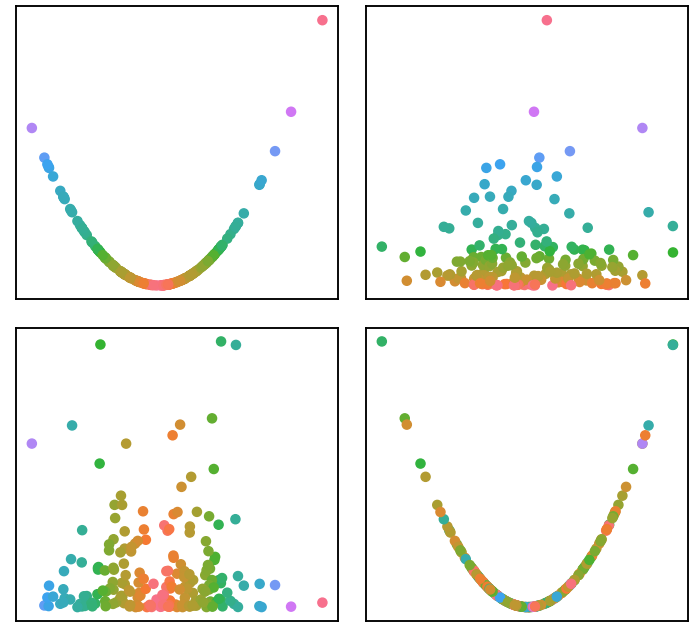

In [14]:
#plot_2views(Xs_train, y_train, title=f'{transform} Latents', scatter_kwargs={'cmap':matplotlib.colors.ListedColormap(['red','blue']), 'alpha':0.3})

labels = np.abs(Xs_train[0][:,0])
#cmap = matplotlib.colors.ListedColormap(sns.color_palette("Blues").as_hex())
cmap = matplotlib.colors.ListedColormap(sns.color_palette("husl", len(labels)).as_hex())
pairedviews_plot(Xs_train, labels, ticks=False, labels=False, context='talk', scatter_kwargs={'cmap':cmap, 'alpha':1.0}, show=False)
plt.savefig('/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/multiview/figure_images/poly_raw.png')

In [15]:
ktype='poly'
kcca = KCCA(ktype=ktype, reg = 0.1, degree=2.0, constant=0.1, n_components = 2, test=True)
components = kcca.fit(Xs_train).transform(Xs_train)

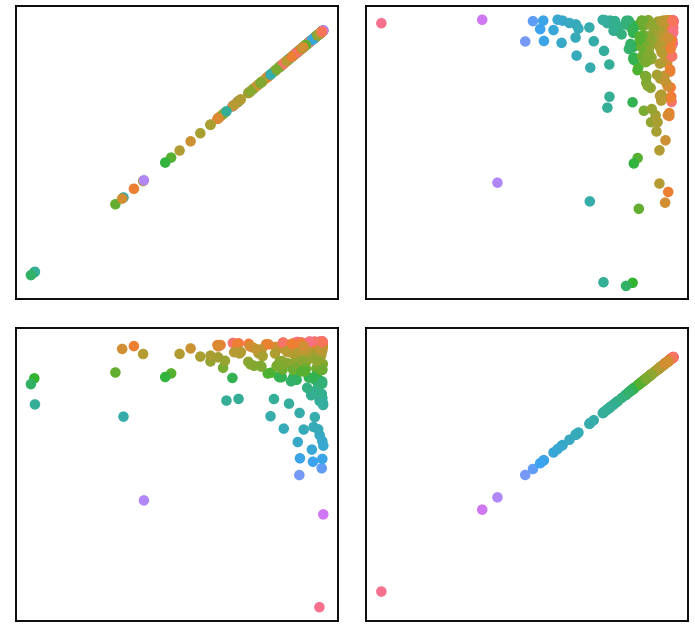

In [16]:
#plot_2views(components, y_test, tlabelsCA', equal_axes=True, scatter_kwargs={'cmap':matplotlib.colors.ListedColormap(['red','blue']), 'alpha':0.3})
pairedviews_plot(components, labels, ticks=False, labels=False, equal_axes=True, context='talk', scatter_kwargs={'cmap':cmap, 'alpha':1.0}, show=False)
plt.savefig('/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/multiview/figure_images/poly_kcca.png')

### Gaussian

In [22]:
transform = 'sin'
n_noise = 0
GM_train.sample_views(transform=transform, n_noise=n_noise)
GM_test.sample_views(transform=transform, n_noise=n_noise)

Xs_train,y_train = GM_train.get_Xy()
Xs_test,y_test = GM_test.get_Xy()

In [23]:
labels = np.abs(Xs_train[0][:,0])
#cmap = matplotlib.colors.ListedColormap(sns.color_palette("Blues").as_hex())
cmap = matplotlib.colors.ListedColormap(sns.color_palette("husl", len(labels)).as_hex())

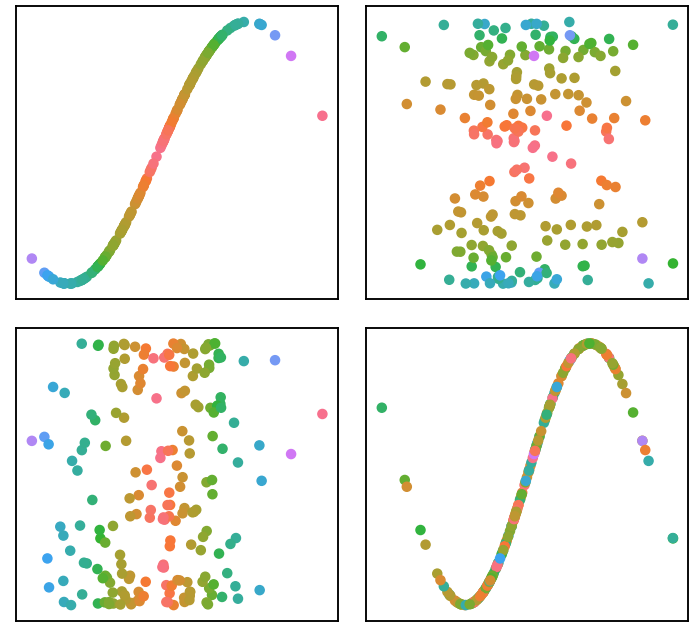

In [24]:
#plot_2views(Xs_train, y_train, title=f'{transform} Latents', scatter_kwargs={'cmap':matplotlib.colors.ListedColormap(['red','blue']), 'alpha':0.3})
pairedviews_plot(Xs_train, labels, ticks=False, labels=False, context='talk', scatter_kwargs={'cmap':cmap, 'alpha':1.0}, show=False)
plt.savefig('/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/multiview/figure_images/gauss_raw.png')

In [25]:
ktype='gaussian'
kcca = KCCA(ktype=ktype, reg = 1.0, sigma=2.0, n_components = 2, test=True)
components = kcca.fit(Xs_train).transform(Xs_train)

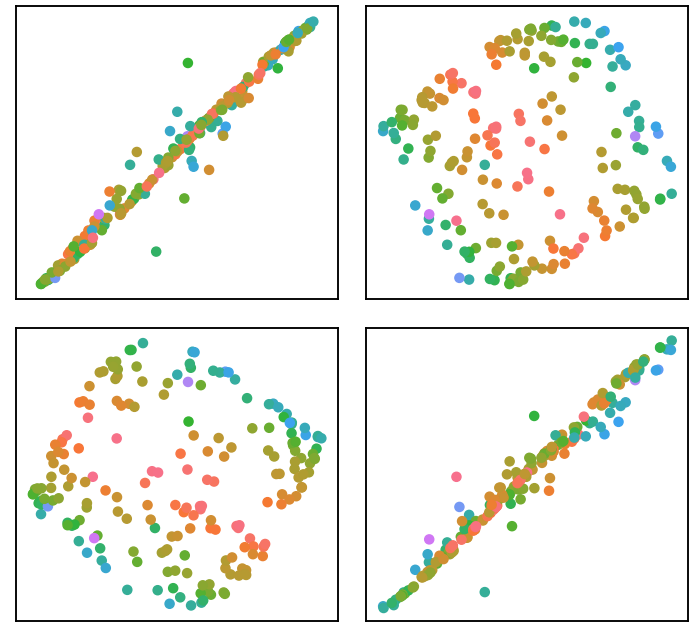

In [26]:
#plot_2views(components, y_test, title=f'{ktype} KCCA', equal_axes=True, scatter_kwargs={'cmap':matplotlib.colors.ListedColormap(['red','blue']), 'alpha':0.3})
pairedviews_plot(components, labels, ticks=False, labels=False, equal_axes=True, context='talk', scatter_kwargs={'cmap':cmap, 'alpha':1.0}, show=False)
plt.savefig('/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/multiview/figure_images/gauss_kcca.png')